In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib

In [ ]:
url = 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
urllib.request.urlretrieve(url, 'full_data.csv')

In [ ]:
corona = pd.read_csv('full_data.csv')

In [ ]:
corona.head()
corona.dtypes

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
corona['date'] = pd.to_datetime(corona['date'])
corona.dtypes

date               datetime64[ns]
location                   object
new_cases                 float64
new_deaths                float64
total_cases               float64
total_deaths              float64
weekly_cases              float64
weekly_deaths             float64
biweekly_cases            float64
biweekly_deaths           float64
dtype: object

In [ ]:
# original csv has lots of nans -> time to replace
corona.fillna(0.0, inplace=True)

In [ ]:
corona.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
(corona['location'] == '0').sum()

0

In [ ]:
corona.isna().sum()

date               0
location           0
new_cases          0
new_deaths         0
total_cases        0
total_deaths       0
weekly_cases       0
weekly_deaths      0
biweekly_cases     0
biweekly_deaths    0
dtype: int64

In [ ]:
# analysing particular countries, creating data subset ::
countries = ['Poland', 'Germany', 'Italy']
corona_countries = corona[corona.location.isin(countries)]

In [ ]:
corona_countries.head()
# indexes are kinda messy, starting from 20056 or so
# dates are the same for each country, so i want it to be the index of my new dataframe
corona_countries.set_index('date', inplace=True)

In [ ]:
corona_countries.columns
# adding another column : mortality_rate
corona_countries['mortality_rate'] = corona_countries['total_deaths'] / corona_countries['total_cases']
corona_countries.tail()


# looking at the specific time in data ::
# corona_countries = corona_countries.loc['2020-02-15' : '2020-03-22']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths,mortality_rate
date,,,,,,,,,,
2020-11-25,Poland,32733.0,540.0,909066.0,14314.0,156126.0,3466.0,315474.0,5939.0,0.015746
2020-11-26,Poland,15356.0,674.0,924422.0,14988.0,151599.0,3537.0,305609.0,6183.0,0.016213
2020-11-27,Poland,16690.0,580.0,941112.0,15568.0,144314.0,3480.0,299616.0,6488.0,0.016542
2020-11-28,Poland,17304.0,579.0,958416.0,16147.0,139154.0,3433.0,292869.0,6648.0,0.016848
2020-11-29,Poland,15177.0,599.0,973593.0,16746.0,130118.0,3458.0,282475.0,6701.0,0.017200


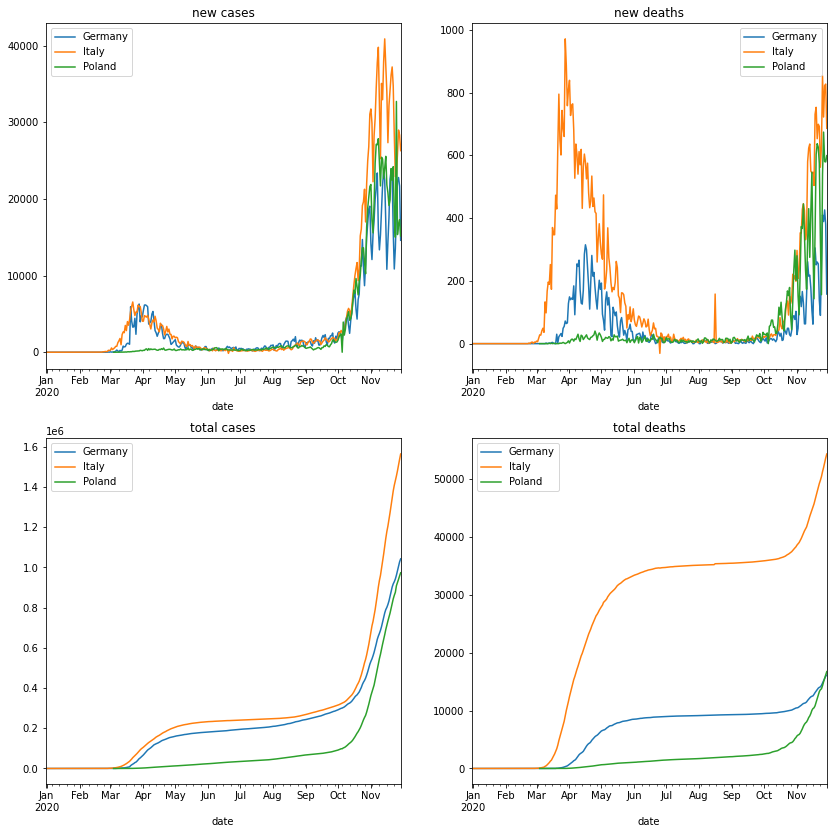

In [ ]:
# plotting some data ::
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,14))
(corona_countries.groupby('location')['new_cases']).plot(ax=axes[0,0], legend=True)
(corona_countries.groupby('location')['new_deaths']).plot(ax=axes[0,1], legend=True)
(corona_countries.groupby('location')['total_cases']).plot(ax=axes[1,0], legend=True)
(corona_countries.groupby('location')['total_deaths']).plot(ax=axes[1,1], legend=True)

axes[0,0].set_title('new cases')
axes[0,1].set_title('new deaths')
axes[1,0].set_title('total cases')
axes[1,1].set_title('total deaths')
tmp = (corona_countries.groupby('location')['total_cases']).max()
# tmp = set(tmp)
# for idx, rows in corona_countries.iterrows():
#   if rows['total_cases'] in tmp:
#     print(idx, rows['location'], rows['total_cases'])


In [ ]:
# expanding dataframe :: everything but whole world and china
corona_all = corona.loc[~(corona['location'].isin(['China', 'World']))]


In [ ]:
corona_all.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
corona_all = (corona_all.groupby(['location', 'date'])['total_cases', 'total_deaths'].sum()).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
corona_all = corona_all.sort_values(by=['location', 'date'], ascending=False)
print(corona_all)

          location       date  total_cases  total_deaths
58683     Zimbabwe 2020-11-29       9822.0         275.0
58682     Zimbabwe 2020-11-28       9714.0         275.0
58681     Zimbabwe 2020-11-27       9623.0         274.0
58680     Zimbabwe 2020-11-26       9508.0         274.0
58679     Zimbabwe 2020-11-25       9398.0         274.0
...            ...        ...          ...           ...
4      Afghanistan 2020-01-04          0.0           0.0
3      Afghanistan 2020-01-03          0.0           0.0
2      Afghanistan 2020-01-02          0.0           0.0
1      Afghanistan 2020-01-01          0.0           0.0
0      Afghanistan 2019-12-31          0.0           0.0

[58684 rows x 4 columns]


In [ ]:
# bar plot -> cases, deaths in a function of time
def plot_bar(feature, value, title, df, size):
  f, ax = plt.subplots(1,1, figsize=(4 * size, 4))
  df = df.sort_values([value], ascending=False).reset_index(drop=True)
  g = sns.barplot(df[feature][0:10], df[value][0:10], palette='Set3')
  g.set_title("Number of {} - highest 10 values".format(title))
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


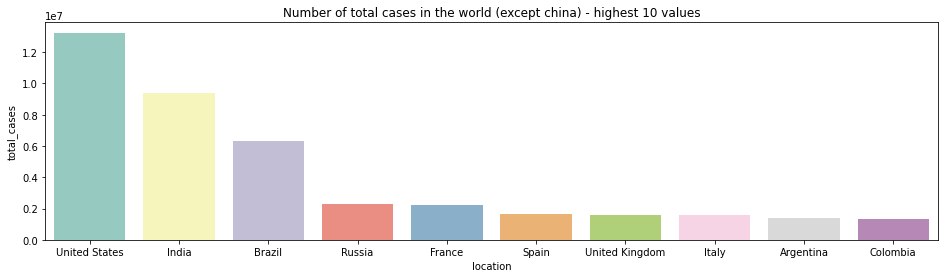

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


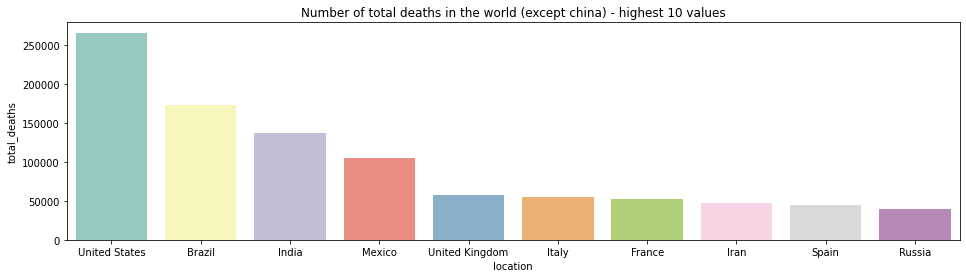

In [ ]:
filtered_corona_all = corona_all.drop_duplicates(subset='location', keep='first')
plot_bar('location', 'total_cases', 'total cases in the world (except china)', filtered_corona_all, 4)
plot_bar('location', 'total_deaths', 'total deaths in the world (except china)', filtered_corona_all, 4)